In [577]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [578]:
file_name='../log/log_12_05_17_03'
with open(file_name) as f:
    lines = f.readlines()

In [582]:
train_ls=[];val_ls=[];step=[]; acc_t=[]; acc_v=[]
for l in lines:
    if 'DEBUG' in l:
        pos_l = l.find('VAL loss/acc:') + 14
        pos_r = l[pos_l:].find('/')
        val_ls.append( float(l[pos_l:][:pos_r]) )
        
        pos_l = l.find('Minibatch loss/acc:') + 20
        pos_r = l[pos_l:].find('/')
        train_ls.append( float(l[pos_l:][:pos_r]) )

        pos_l = l.find('Step')+5
        pos_r = l[pos_l:].find(':')
        step.append(  int(l[pos_l:][:pos_r]) )
        
        acc_t.append(float(l.split('/')[2].split(',')[0]))
        acc_v.append(float(l.split('/')[-1].strip()))
        
        print 'step %d, train/val loss: %f/%f, train/val acc: %f/%f'%(step[-1], train_ls[-1],val_ls[-1],acc_t[-1],acc_v[-1])
        #if step[-1] == 10000:
        #    break

step 0, train/val loss: 1.901939/3.828910, train/val acc: 0.020000/0.016170
step 100, train/val loss: 6.351110/3.782644, train/val acc: 0.250000/0.078085
step 200, train/val loss: 1.721550/3.313202, train/val acc: 0.710000/0.164255
step 300, train/val loss: 1.410857/2.973173, train/val acc: 0.720000/0.243191
step 400, train/val loss: 1.922743/2.811705, train/val acc: 0.690000/0.269149
step 500, train/val loss: 0.360490/2.611949, train/val acc: 0.750000/0.300426
step 600, train/val loss: 3.050684/2.636653, train/val acc: 0.650000/0.309149
step 700, train/val loss: 0.892096/2.572436, train/val acc: 0.750000/0.321277
step 800, train/val loss: 0.728333/2.621526, train/val acc: 0.820000/0.320851
step 900, train/val loss: 0.473837/2.672803, train/val acc: 0.880000/0.322553
step 1000, train/val loss: 0.247424/2.599576, train/val acc: 0.870000/0.331489
step 1100, train/val loss: 0.543504/2.730577, train/val acc: 0.720000/0.313404
step 1200, train/val loss: 0.582694/2.666999, train/val acc: 0.8

Text(0.5,1,u'Learning Curve - Loss')

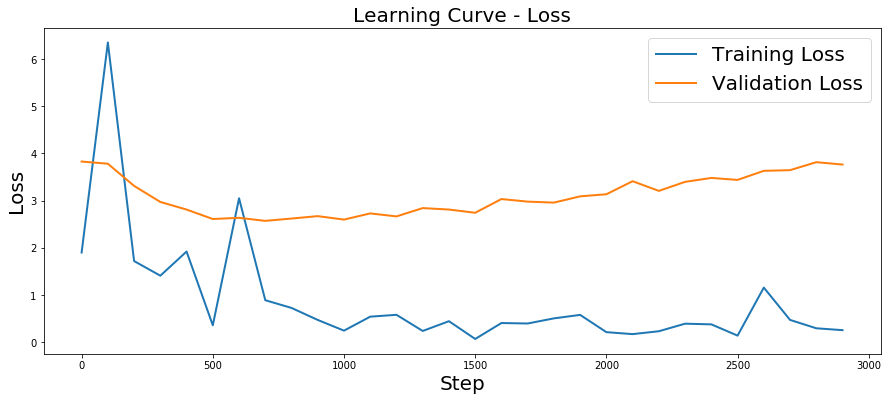

In [583]:
fig=plt.figure(figsize=(15,6))
plt.plot(step,train_ls,lw=2)
plt.plot(step,val_ls,lw=2)
plt.legend(['Training Loss','Validation Loss'],fontsize=20)
plt.xlabel('Step',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Learning Curve - Loss',fontsize=20)

Text(0.5,1,u'Model response to dataset size')

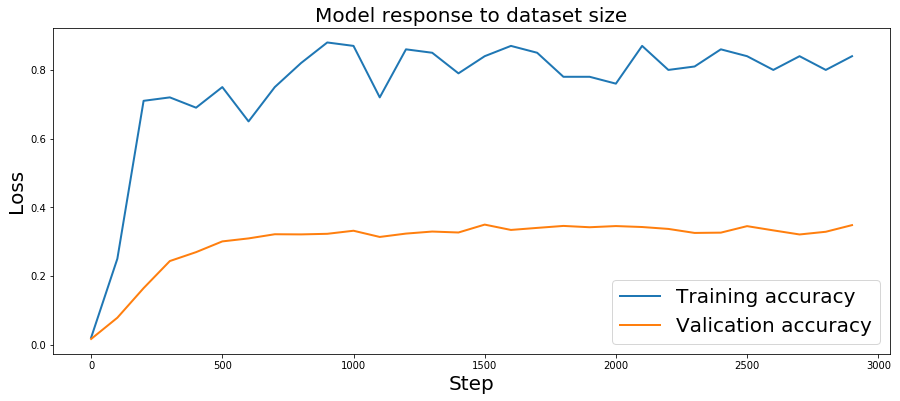

In [584]:
fig=plt.figure(figsize=(15,6))
plt.plot(step,acc_t,lw=2)
plt.plot(step,acc_v,lw=2)
plt.legend(['Training accuracy','Valication accuracy'],fontsize=20)
plt.xlabel('Step',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Model response to dataset size',fontsize=20)

In [ ]:
# some dirty workarounds to examine confusion matrix
count = []
for i,l in enumerate(lines):
    if 'Step 500' in l:
        for j in lines[i+16+1][2:-3].split('.'):
            count.append( int(j.strip()) )
        break
np.argsort(count)
count